### 1. Defining the Question

##### a) Specifying the Question
> The analysis aims to study the factors that affecting the price of houses. we are required to do this using information sourced from real estate properties that was collected over a few years.
##### b) Defining the Metric for Success
> The metric for success of the project is to build a model that can accurately predict the sale price of a house with a high level of accuracy.
##### c) Understanding the Context
>Hass Consulting Company is a real estate firm that offers investment-grade developments all over Nairobi City. The developments offered have been conceptualized by their development team to be high quality assets using a data-driven approach in planning and design, that gears property for high rental returns and an escalated rate of capital growth.
##### d) Recording the Experimental Design
> Perform your EDA

> 5 Performing regression analysis.

> Incorporate categorical independent variables into your models.

> Check for multicollinearity.

> Perform regression analysis using the following techniques and access their performance, giving a recommendation of the best:

>   1.Multiple Linear Regression

>   2.Quantile Regression

>   3.Ridge Regression

>   4.Lasso Regression

>   5.Elastic Net Regression

> Provide a recommendation based on your analysis.

> Create residual plots for your models, and assess heteroskedasticity using Barlett's test.

> Challenge your solution by providing insights on how you can make improvements in model improvement.
##### e) Data Relevance
> The data provided for this project is relevant and has been provided by Hass Consulting and is available on their website.

### 2. Reading the Data

In [288]:
# let's import the libraries we need for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from scipy.stats import bartlett, chi2, loguniform
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import os
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error, r2_score, f1_score, precision_score, recall_score, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression, RidgeClassifier
from sklearn.decomposition import PCA

# let's import warnings to ignore the warnings
from warnings import filterwarnings
filterwarnings('ignore')
%matplotlib inline

In [4]:
# let's read the data and store it in a dataframe
house_data = pd.read_csv('Independent Project Week 7 - house_data.csv')

### 3. Checking the Data

In [5]:
# let's preview the head of the dataframe
house_data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
# let's preview the tail of the dataframe
house_data.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [10]:
# let's preview the shape of the dataframe and the columns of the dataframe and print the number of rows and columns
print('The dataframe has', house_data.shape[0], 'rows and', house_data.shape[1], 'columns.')

The dataframe has 21613 rows and 20 columns.


In [14]:
# let's preview the columns of the dataframe
housing_columns = house_data.columns.tolist()
housing_columns

['id',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [16]:
# let's preview the data types of the columns of the dataframe
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

> The dataset does not contain any missing values.

### 4. External Data Sources Validation

### 5. Tidying the Dataframe

In [29]:
# let's drop the id column
house_data.drop('id', axis=1, inplace=True)

In [30]:
# let's check for missing values
house_data.isnull().sum().any()

False

> The dataframe has no missing values.

In [31]:
# let's check for anomalies
house_data.duplicated().sum()

2

In [32]:
# let's drop the duplicated data
house_data.drop_duplicates(inplace=True)

# let's check for duplicated data again for verification
house_data.duplicated().sum()

0

> The dataframe had duplicated rows. We dropped them and checked for duplicates again.

In [33]:
# let's create a function that checks for the percentage of outliers in a dataset using Interquartile range
def check_outliers(df):
    # instantiate the quantile variables
    Quantile_1, Quantile_2, Quantile_3 = 0, 0, 0

    # converting to dataframe
    check_outliers = pd.DataFrame()

    # let's get the numerical columns
    num_cols = df.select_dtypes(include=['int64', 'float64'])

    # getting the quantiles from the numerical columns
    Quantile_1 = num_cols.quantile(0.25)
    Quantile_3 = num_cols.quantile(0.75)

    # let's get the IQR
    IQR = Quantile_3 - Quantile_1

    # let's get the outliers
    check_outliers = num_cols[((num_cols < (
        Quantile_1 - 1.5 * IQR)) | (num_cols > (Quantile_3 + 1.5 * IQR))).any(axis=1)]

    # printing the number of outliers and the percentage of outliers
    print('There are {} outliers in the dataset.'.format(
        check_outliers.shape[0]))
    print('The percentage of outliers in the dataset is {}%.'.format(
        round((check_outliers.shape[0] / df.shape[0]) * 100, 2)))


In [34]:
# let's check for outliers in the dataframe
check_outliers(house_data)

There are 6680 outliers in the dataset.
The percentage of outliers in the dataset is 30.91%.


> We will not drop outliers in the dataframe as they constitute a huge chunk of the dataframe

In [175]:
# let's create a new dataframe wiqh the outliers removed for comparison
Q_1 = house_data.quantile(0.25)
Q_3 = house_data.quantile(0.75)
IQR = Q_3 - Q_1
house_data_without_outliers = house_data[~ (
    (house_data < (Q_1 - 1.5 * IQR)) | (house_data > (Q_3 + 1.5 * IQR))).any(axis=1)]


check_outliers(house_data_without_outliers)

There are 1543 outliers in the dataset.
The percentage of outliers in the dataset is 10.34%.


In [176]:
# let's check whether the columns are properly named
house_data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

> The columns are in the correct order of naming.

### 6. Exploratory Data Analysis

In [256]:
### functions we will use during the EDA ##
###########################################

# i) for categorical plots we will re use the function below
def Categorical_Plots(column, data):
  fig, ax = plt.subplots(figsize=(10, 5))
  sns.countplot(data[column], palette='magma', orient='v')
  plt.title('Bar Plot of ' + column, fontsize=20, y=1.05)
  plt.xlabel(column, fontsize=15)
  plt.ylabel('Count', fontsize=15)
  plt.show()


# ii) for measure of central tendency we will use the following function
def Measure_Central(measure, columns, data):
  for column in columns:
    if measure == 'mean':
      print(f"{column} mean is {data[column].mean()}")
    elif measure == 'median':
      print(f"{column} median is {data[column].median()}")
    elif measure == 'mode':
      print(f"{column} mode is {data[column].mode()}")


# iii) for measure of distribution we will use the following function
def Measure_Distribution(measure, columns, data):
  for column in columns:
    if measure == 'range':
      print(
          f"{column} range is {data[column].max() - data[column].min()}")
    elif measure == 'IQR':
      Q1 = data[column].quantile(0.25)
      Q3 = data[column].quantile(0.75)
      IQR = Q3 - Q1
      print(f"{column} IQR is {IQR}")
    elif measure == 'var':
      print(f"{column} variance is {data[column].var()}")
    elif measure == 'std':
      print(f"{column} Standard Deviation is {data[column].std()}")
    elif measure == 'skew':
      print(f"{column} skewness is {data[column].skew()}")
    elif measure == 'kurt':
      print(f"{column}  kurtosis value is is {data[column].kurt()}")


# iv) for box plots we will use the following function
def Numerical_Box_Plots(column, data1, data2):
  fig, ax = plt.subplots(2, 2, figsize=(12, 10))
  # Outliers present

  # Distribution plot code
  sns.distplot(data1[column], hist=True, ax=ax[0, 0], color='blue')
  ax[0, 0].set_title('Outliers Frequency distribution for ' + column, fontsize=10)
  ax[0, 0].set_xlabel(column, fontsize=8)
  ax[0, 0].set_ylabel('Count', fontsize=8)
  # Box plot code
  sns.boxplot(y=data1[column], ax=ax[0, 1], color='blue')
  ax[0, 1].set_title(f'Outliers boxplot for {column}')
  ax[0, 1].set_xlabel(column)

  # No outliers

  # Distribution plot code
  sns.distplot(data2[column], hist=True, ax=ax[1, 0], color='maroon')
  ax[1, 0].set_title('No outliers frequency distribution for ' + column, fontsize=10)
  ax[1, 0].set_xlabel(column, fontsize=8)
  ax[1, 0].set_ylabel('Count', fontsize=8)

  # Box plot code
  sns.boxplot(y=data2[column], ax=ax[1, 1], color='maroon')
  ax[1, 1].set_title(f'No outliers boxplot for {column}')
  ax[1, 1].set_xlabel(column)
  plt.show()

############################################
## bivariate analysis functions are below ##
############################################
# i) a function to generate a crosstab
def crosstab(x, y, df):
    ct = pd.crosstab(df[x], df[y])
    ct.plot.bar(stacked=True, figsize=(10,5))
    plt.title('Crosstab of {} and {}'.format(x, y), fontsize=15)
    plt.xlabel('{}'.format(x), fontsize=15)
    plt.ylabel('Count', fontsize=15)
    plt.show()

# ii) a function to generate a countplot
def countplot(x, df):
    fig, ax = plt.subplots(figsize=(10,5))
    sns.countplot(df[x])
    plt.title('Countplot of {}'.format(x), fontsize=15)
    plt.xlabel('{}'.format(x), fontsize=15)
    plt.ylabel('Count', fontsize=15)
    plt.show()

# numerical numerical columns

# i) a function to generate a line scatter plot
def line_scatter(x, y, df):
    fig, ax = plt.subplots(figsize=(10,5))
    sns.regplot(x=x, y=y, data=df, ax=ax)
    plt.title('Line Scatter Plot of {} and {}'.format(x, y), fontsize=15)
    plt.xlabel('{}'.format(x), fontsize=15)
    plt.ylabel('{}'.format(y), fontsize=15)
    plt.show()

# ii) a function to generate a correlation matrix
def corr(x, y, df):
    print('Pearson correlation of {} and {} is {}'.format(x, y, df[x].corr(df[y])))

##### a) Univariate Analysis

In [257]:
# let's get the columns into a list and store them in a variable
columns = list(house_data.columns)
columns

# let's get the unique values for the columns in the dataset
for column in columns:
    print(f"{column} = {len(house_data[column].unique().tolist())}")


price = 3625
bedrooms = 13
bathrooms = 30
sqft_living = 1038
sqft_lot = 9782
floors = 6
waterfront = 2
view = 5
condition = 5
grade = 12
sqft_above = 946
sqft_basement = 306
yr_built = 116
yr_renovated = 70
zipcode = 70
lat = 5034
long = 752
sqft_living15 = 777
sqft_lot15 = 8689


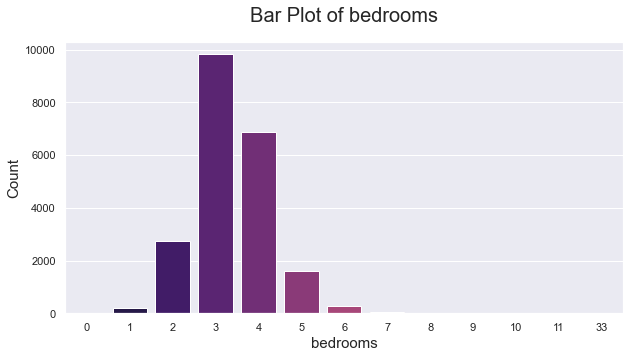

In [258]:
# count plot for bedrooms
Categorical_Plots('bedrooms', house_data)

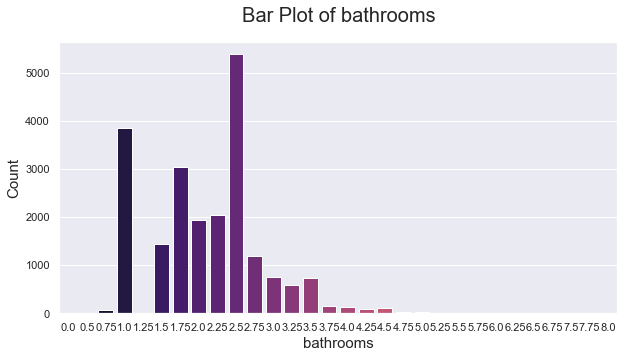

In [259]:
# count plot for bathrooms
Categorical_Plots('bathrooms', house_data)

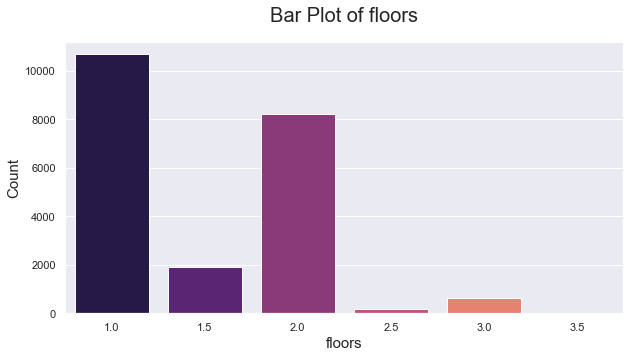

In [260]:
# count plot for floors
Categorical_Plots('floors', house_data)

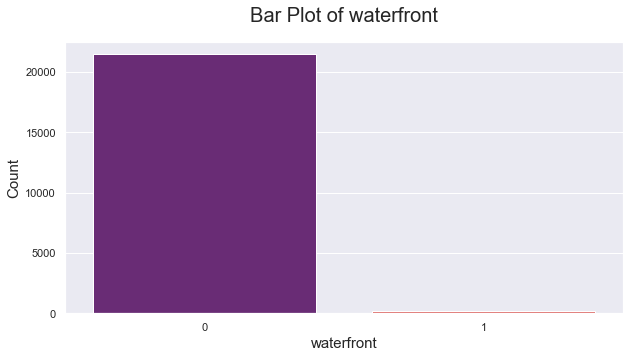

In [261]:
# count plot for waterfront
Categorical_Plots('waterfront', house_data)

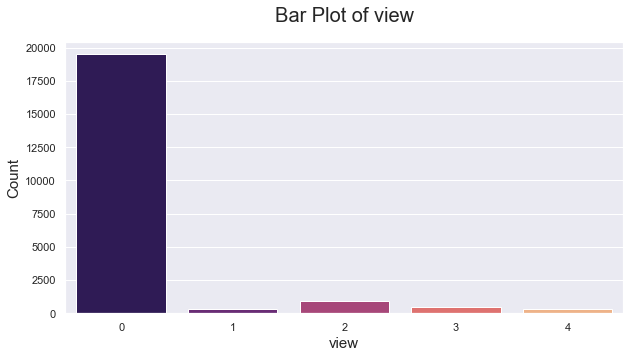

In [262]:
# count plot for view
Categorical_Plots('view', house_data)

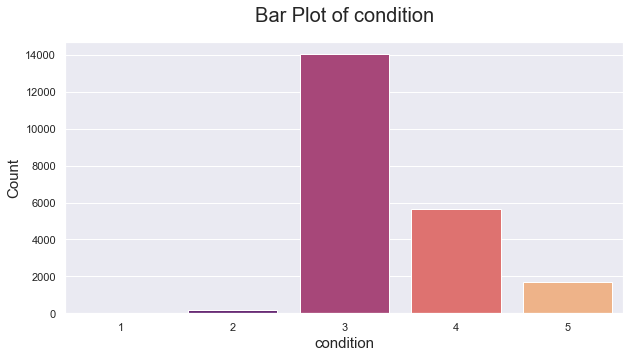

In [263]:
# count plot for condition
Categorical_Plots('condition', house_data)

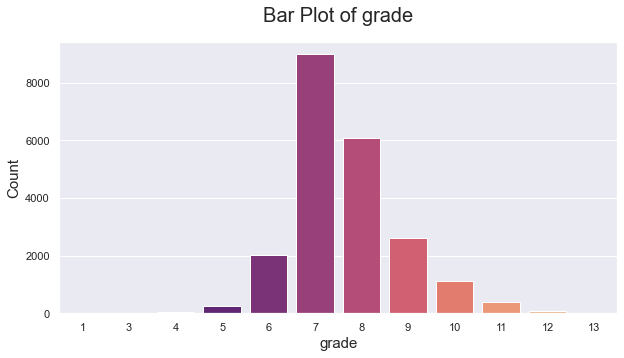

In [264]:
# count plot for grade
Categorical_Plots('grade', house_data)

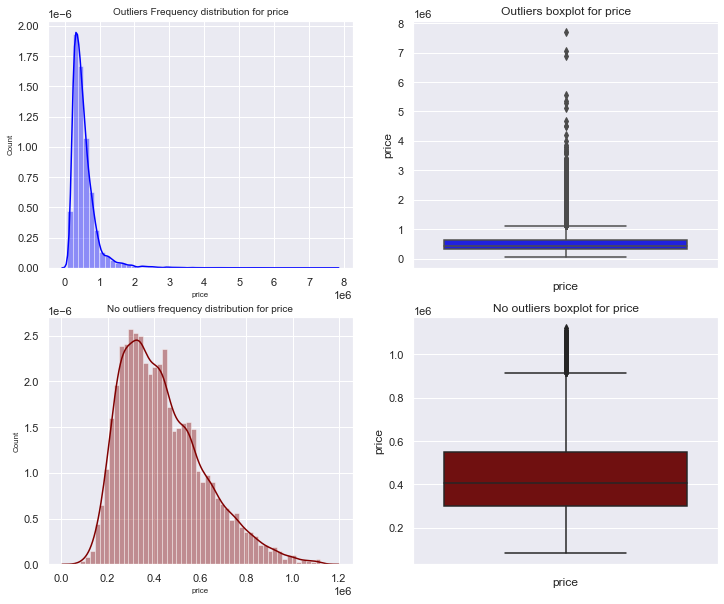

In [265]:
# box plot for price
Numerical_Box_Plots(columns[0], house_data, house_data_without_outliers)

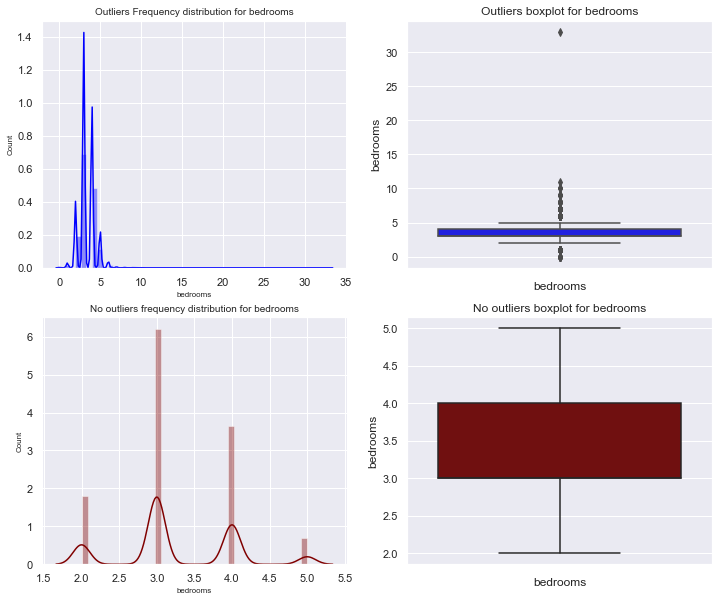

In [266]:
# box plot for bedrooms
Numerical_Box_Plots(columns[1], house_data, house_data_without_outliers)

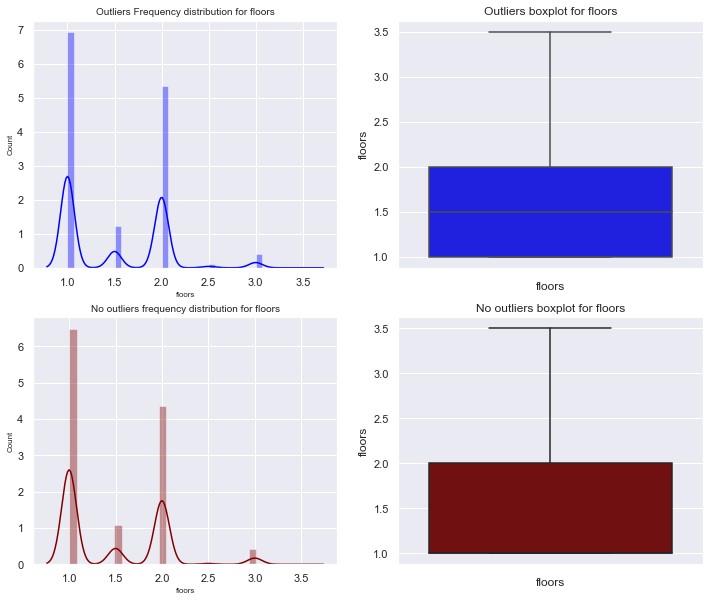

In [267]:
# boxplot for floors
Numerical_Box_Plots(columns[5], house_data, house_data_without_outliers)

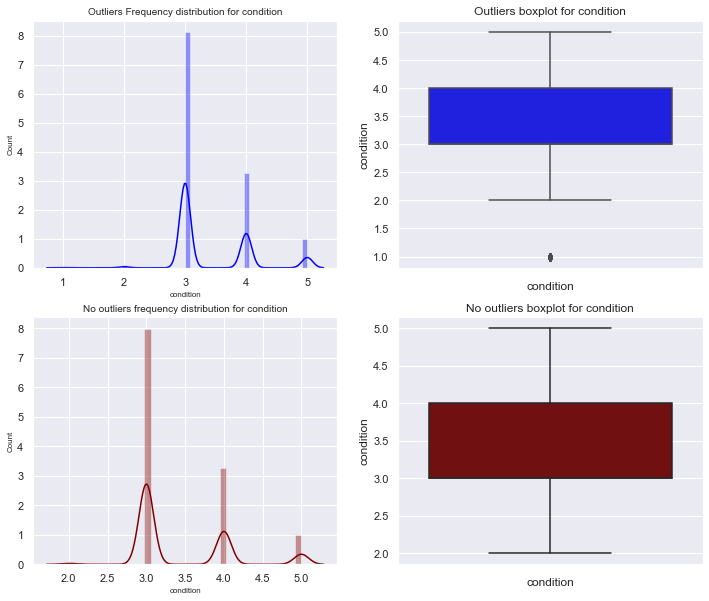

In [268]:
# boxplot for condition
Numerical_Box_Plots(columns[8], house_data, house_data_without_outliers)

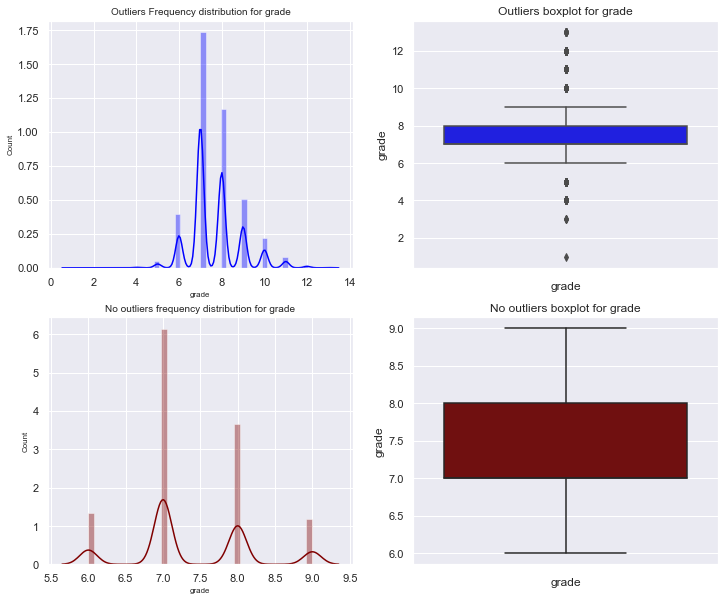

In [269]:
# boxplot for grade
Numerical_Box_Plots(columns[9], house_data, house_data_without_outliers)

> The boxplots show that there's a change in the distributions of the variables from when there were outliers to when there were none.

In [270]:
# IQR
Measure_Distribution('IQR', columns, house_data)

price IQR is 323162.5
bedrooms IQR is 1.0
bathrooms IQR is 0.75
sqft_living IQR is 1120.75
sqft_lot IQR is 5650.5
floors IQR is 1.0
waterfront IQR is 0.0
view IQR is 0.0
condition IQR is 1.0
grade IQR is 1.0
sqft_above IQR is 1020.0
sqft_basement IQR is 560.0
yr_built IQR is 46.0
yr_renovated IQR is 0.0
zipcode IQR is 85.0
lat IQR is 0.20712499999999778
long IQR is 0.20300000000000296
sqft_living15 IQR is 870.0
sqft_lot15 IQR is 4983.25


> The IQR scores above tell us the range of the middle half of the data.

In [271]:
# kurtosis
Measure_Distribution('kurt', columns, house_data)

price  kurtosis value is is 34.51538421151693
bedrooms  kurtosis value is is 49.06562128233084
bathrooms  kurtosis value is is 1.2792645615484326
sqft_living  kurtosis value is is 5.242209340747705
sqft_lot  kurtosis value is is 285.01867792617475
floors  kurtosis value is is -0.4848736638828255
waterfront  kurtosis value is is 127.60182028902261
view  kurtosis value is is 10.900687076848012
condition  kurtosis value is is 0.5253652671372642
grade  kurtosis value is is 1.1918837868245693
sqft_above  kurtosis value is is 3.4019276693258385
sqft_basement  kurtosis value is is 2.714432815066743
yr_built  kurtosis value is is -0.6571807366498081
yr_renovated  kurtosis value is is 18.72154593111135
zipcode  kurtosis value is is -0.8535698817907043
lat  kurtosis value is is -0.6767834455237307
long  kurtosis value is is 1.049927493411873
sqft_living15  kurtosis value is is 1.5969742424841624
sqft_lot15  kurtosis value is is 150.732711029956


> The columns have Leptokurtic, Platykurtic and Mesokurtic distributions as observed.

In [272]:
# skewness
Measure_Distribution('skew', columns, house_data)

price skewness is 4.021354631513139
bedrooms skewness is 1.9743628437076959
bathrooms skewness is 0.5111461154271603
sqft_living skewness is 1.4714674846314069
sqft_lot skewness is 13.058690623882546
floors skewness is 0.616339735126005
waterfront skewness is 11.383760788442409
view skewness is 3.396676532553183
condition skewness is 1.0326458326997079
grade skewness is 0.7715804037126582
sqft_above skewness is 1.4467403506883187
sqft_basement skewness is 1.577730731994438
yr_built skewness is -0.4697823592834102
yr_renovated skewness is 4.551733778950017
zipcode skewness is 0.4056844629809451
lat skewness is -0.48518259836955446
long skewness is 0.8852768444876
sqft_living15 skewness is 1.1082576840301879
sqft_lot15 skewness is 9.505817992358532


> From the univariate analysis, we can see that some of the columns have a positive skew with two having a slightly negative skew.

In [273]:
# standard deviation
Measure_Distribution('std', columns, house_data)

price Standard Deviation is 367399.6343396715
bedrooms Standard Deviation is 0.9301025674900599
bathrooms Standard Deviation is 0.7702384023013223
sqft_living Standard Deviation is 918.5058048414903
sqft_lot Standard Deviation is 41424.91431047281
floors Standard Deviation is 0.5399103538005785
waterfront Standard Deviation is 0.0865271313948924
view Standard Deviation is 0.7661686037116674
condition Standard Deviation is 0.650782089681918
grade Standard Deviation is 1.1754835625930373
sqft_above Standard Deviation is 828.141154906302
sqft_basement Standard Deviation is 442.61255980102993
yr_built Standard Deviation is 29.3714629233565
yr_renovated Standard Deviation is 401.5170261376965
zipcode Standard Deviation is 53.506882534027355
lat Standard Deviation is 0.1385780192149203
long Standard Deviation is 0.1408301630589205
sqft_living15 Standard Deviation is 685.421474430003
sqft_lot15 Standard Deviation is 27307.00689168585


> Some columns have low standard deviation which means the data are clustered around the mean while others have high standard deviation which indicates data are more spread out.

##### b) Bivariate Analysis

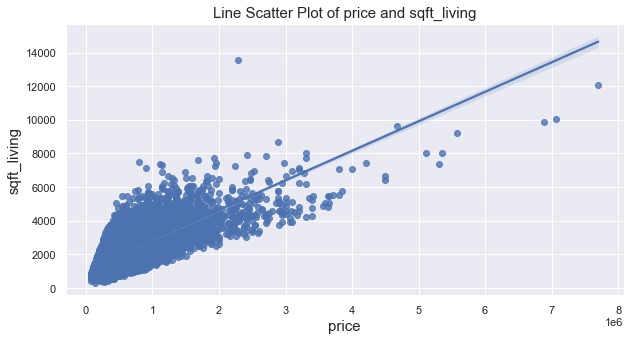

In [274]:
# scatter plot for price and sqft_living
line_scatter('price', 'sqft_living', house_data)

> The bigger the floor room the more expensive the house is.

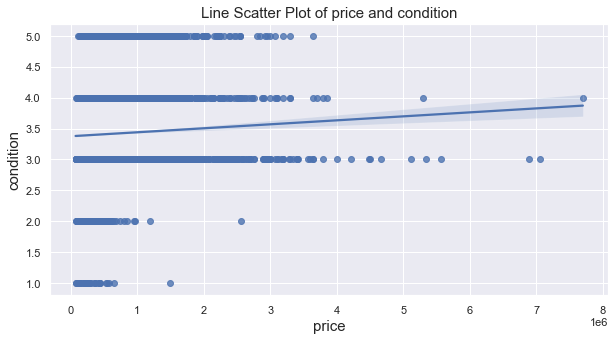

In [275]:
# scatter plot for price and conditions
line_scatter('price', 'condition', house_data)

> The better the condition index of the house the more expensive the house is, but the rise is steady but not steep.

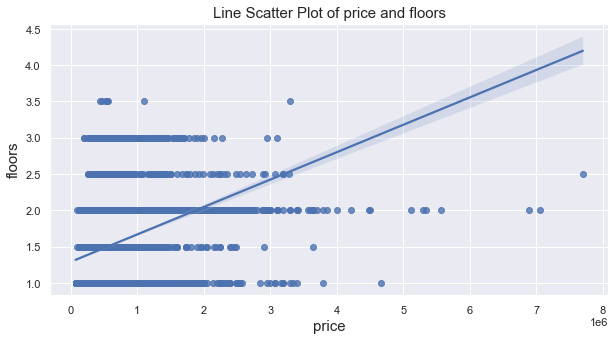

In [276]:
# scatter plot for price and floors
line_scatter('price', 'floors', house_data)

> Higher the number of floors the building has the higher the price.

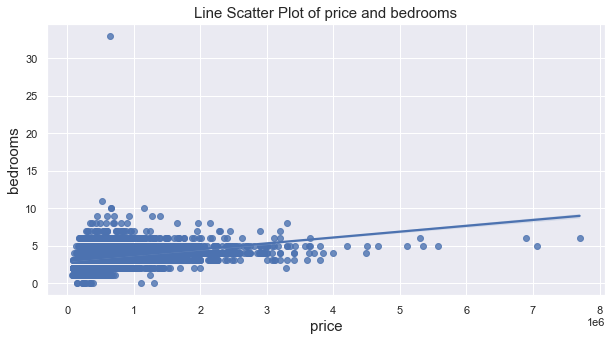

In [277]:
# scatter plot for price and bedrooms
line_scatter('price', 'bedrooms', house_data)

> Houses with more bedrooms have a higher price. The rise is steady.

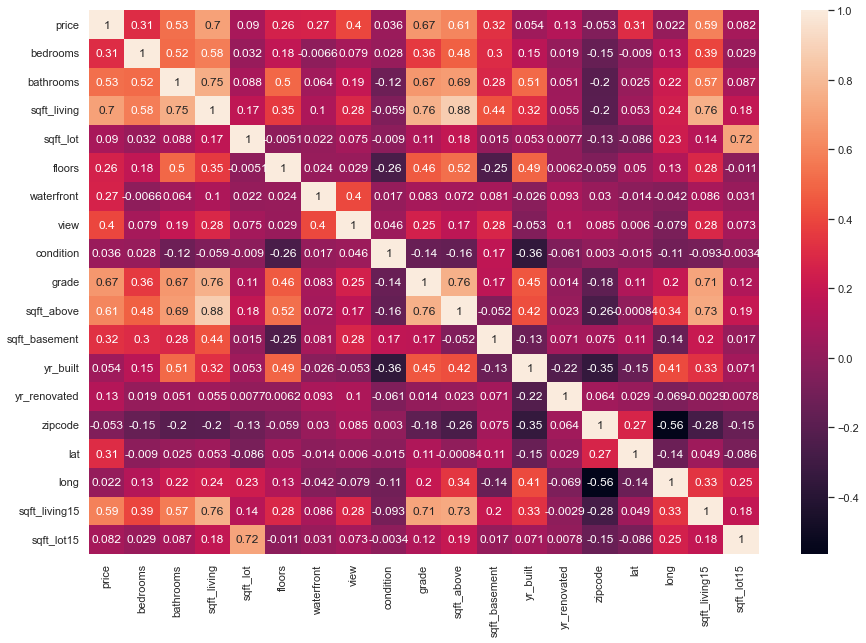

In [283]:
# Plotting a heatmap to show the correlation between the different numerical in the dataframe
sns.set(rc = {'figure.figsize':(15,10)})
sns.heatmap(house_data.corr(),annot=True);

##### c) Multivariate Analysis

In [284]:
# let's perform Principal Component Analysis on the numerical columns
# let's declare our X and y variables
X = house_data.drop(columns=['price'])
y = house_data['price']

In [285]:
# let's split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [286]:
# let's normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [289]:
# let's perform PCA on the training set
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [290]:
# variance explained by each of the components
print(pca.explained_variance_ratio_)

[0.29002294 0.12156175]


> The PCA indicates that it is responsible for the 29% variance in the data.

In [291]:
# let's use multiple linear regression to predict the price of the houses
regressor = LinearRegression()

y_pred = regressor.fit(X_train, y_train).predict(X_test)

In [294]:
# let's evaluate the model
print('R-squared: %.2f' % regressor.score(X_test, y_test))

R-squared: 0.60
